<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
# Code hider, source: http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/
from IPython.display import HTML

HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

In [2]:
%%javascript
// ToC script
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from feature_extract import *



In [4]:
plt.rcParams["figure.figsize"] = [12,6]
pd.options.display.float_format = '{:,.3f}'.format

# Zimmerman paper notes

[Min et al: Mining Smartphone Data to Classify Life-Facets of Social Relationships](https://dl.acm.org/citation.cfm?id=2441810)

[pdf](https://disco.ethz.ch/courses/fs14/seminar/paper/Philipp/4.pdf)


## Mobile communication pattern features

- intensity and regularity
    - \# days {call, sms} / days logged
    - {avg, std} {out, in} {call, sms} per day
- temporal tendency
    - \# {call, sms} at {time of day, day of week} / total
- channel selection
    - out comm / total comm
    - \# calls / total comm
- avoidance
    - missed calls / {out, in} calls
    - in SMS / out SMS
    
**note**: total in this context is in terms of individual  

In [5]:
# load data
#comm_df = pickle.load(open("../data/top_5_contacts_cal.df", "rb"))
comm_df = pickle.load(open("../data/all_contacts_final.df", "rb"))
emm_df = pickle.load(open("../data/emm_raw.df", "rb"))

In [6]:
# build features
comm_features = comm_feature_extract(comm_df, emm_df)

/mnt/c/Users/Tony Liu/Documents/Github/relationship-prediction/feature_extract/feature_extract.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  group_df['mean_in'] = group_df['combined_hash'].map(mean_d)
/mnt/c/Users/Tony Liu/Documents/Github/relationship-prediction/feature_extract/feature_extract.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  group_df['total_wks'] = group_df['pid'].map(wks_d)
/mnt/c/Users/Tony Liu/Documents/Github/relationship-prediction/feature_extract/feature_extract.py:187: RuntimeWarning: invalid value enco

In [7]:
# for unit testing
# test_df = comm_df.loc[comm_df['combined_hash'].isin(['1002060a7f4fe408f8137f12982e5d64cf34693',
#  '10413044ad5f1183e38f5ddf17259326e976231'])]

# display(test_df)
# pickle.dump(test_df, open('test_comm.df', 'wb'), -1)

# emm_df.head()

# test_emm = emm_df.loc[emm_df['pid'].isin(['1002060', '1041304'])]

# pickle.dump(test_emm, open("test_emm.df", "wb"), -1)

# Regularity: comm days / total days ratio

Features:
- `total_calls`
- `total_sms`
- `total_call_days`
- `total_sms_days`
- `reg_call`: regularity of calls, total_call_days / total_days
- `reg_sms`: regularity of sms, total_sms_days / total_days
- `reg_comm`: regularity of communication, total_comm_days / total_days

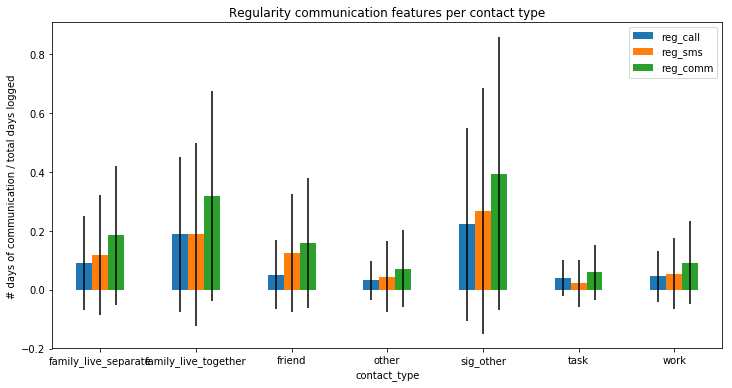

In [8]:
reg_feature_mean = comm_features.groupby('contact_type')[['reg_call', 'reg_sms', 'reg_comm']].mean()
reg_feature_std = comm_features.groupby('contact_type')[['reg_call', 'reg_sms', 'reg_comm']].std()

reg_feature_mean.plot.bar(rot=0, yerr=reg_feature_std)
plt.title("Regularity communication features per contact type")
plt.ylabel("# days of communication / total days logged")
plt.show()

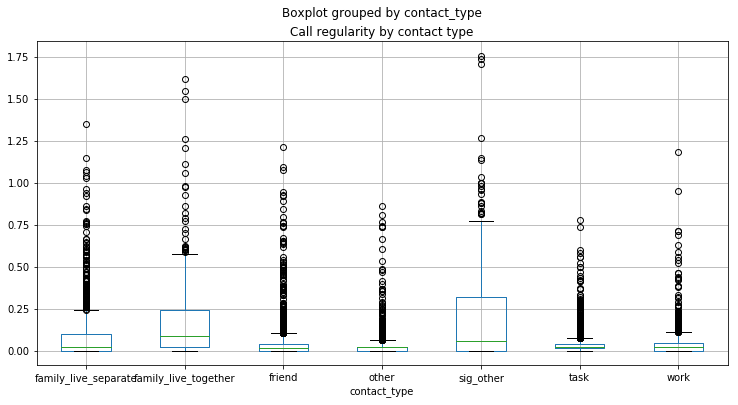

In [9]:
comm_features.boxplot(column='reg_call', by='contact_type')
plt.title("Call regularity by contact type")
plt.show()

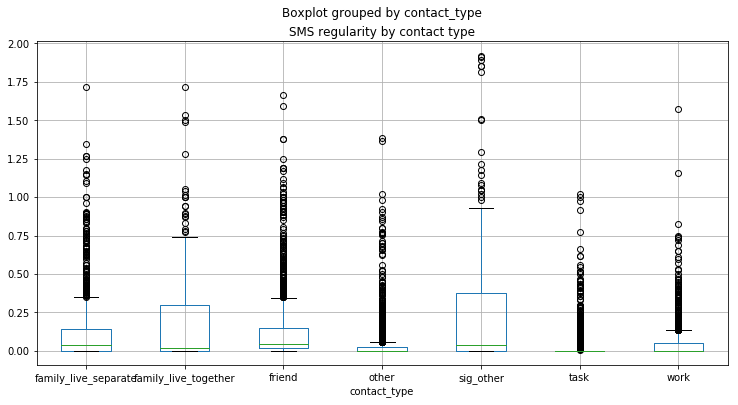

In [10]:
comm_features.boxplot(column='reg_sms', by='contact_type')
plt.title("SMS regularity by contact type")
plt.show()

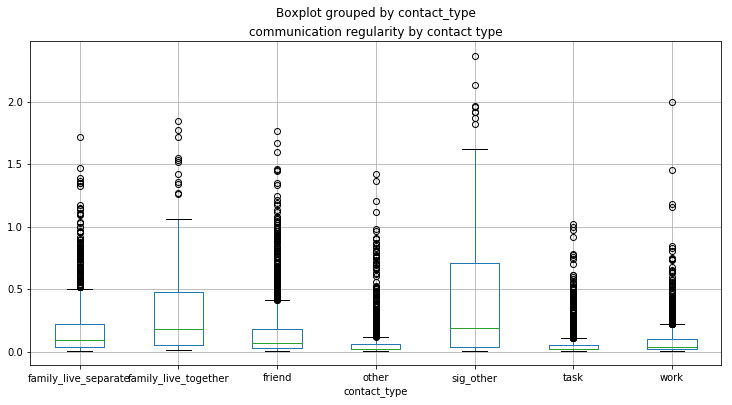

In [11]:
comm_features.boxplot(column='reg_comm', by='contact_type')
plt.title("communication regularity by contact type")
plt.show()

# Temporal tendency: time of day, day of week

Features:
- `time_of_day_{0-5}_{call, sms}`: # {call, sms} at time of day / total
- `day_{0-6}_{call, sms}`: # {call, sms} at day of week / total

## Temporal tendency: SMS

In [12]:
sms_features = comm_features.loc[comm_features['total_sms'] > 0]
time_of_day_sms = ["time_of_day_{}_sms".format(x) for x in range(4)]
day_of_week_sms = ["day_{}_sms".format(x) for x in range(7)]

time_day_sms_mean = sms_features.groupby('contact_type')[time_of_day_sms].mean().T
time_day_sms_std = sms_features.groupby('contact_type')[time_of_day_sms].std()
display(time_day_sms_mean)

day_wk_sms_mean = sms_features.groupby('contact_type')[day_of_week_sms].mean().T
day_wk_sms_std = sms_features.groupby('contact_type')[day_of_week_sms].std()

display(day_wk_sms_mean)

contact_type,family_live_separate,family_live_together,friend,other,sig_other,task,work
time_of_day_0_sms,0.030,0.039,0.035,0.046,0.055,0.026,0.037
time_of_day_1_sms,0.228,0.180,0.220,0.278,0.229,0.325,0.291
time_of_day_2_sms,0.422,0.452,0.410,0.464,0.374,0.448,0.431
time_of_day_3_sms,0.321,0.330,0.335,0.212,0.341,0.200,0.241


contact_type,family_live_separate,family_live_together,friend,other,sig_other,task,work
day_0_sms,0.122,0.160,0.135,0.155,0.155,0.139,0.156
day_1_sms,0.127,0.143,0.130,0.135,0.151,0.164,0.143
day_2_sms,0.121,0.129,0.131,0.150,0.152,0.160,0.181
day_3_sms,0.152,0.130,0.158,0.153,0.160,0.135,0.146
day_4_sms,0.178,0.170,0.173,0.158,0.165,0.174,0.189
day_5_sms,0.166,0.133,0.147,0.117,0.106,0.133,0.098
day_6_sms,0.133,0.134,0.125,0.132,0.111,0.095,0.088


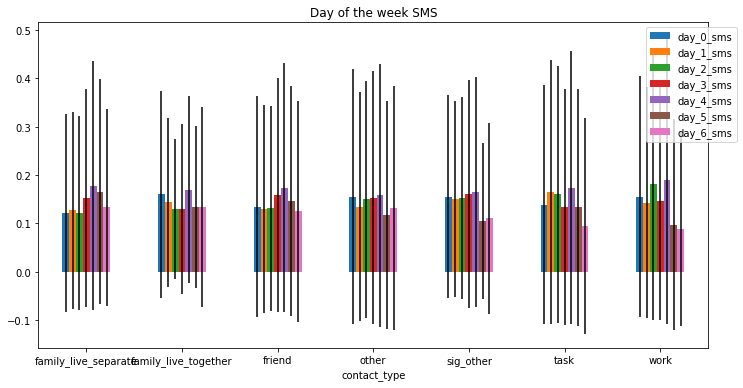

In [13]:
day_wk_sms_mean.T.plot.bar(rot=0, yerr=day_wk_sms_std)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Day of the week SMS")
plt.show()

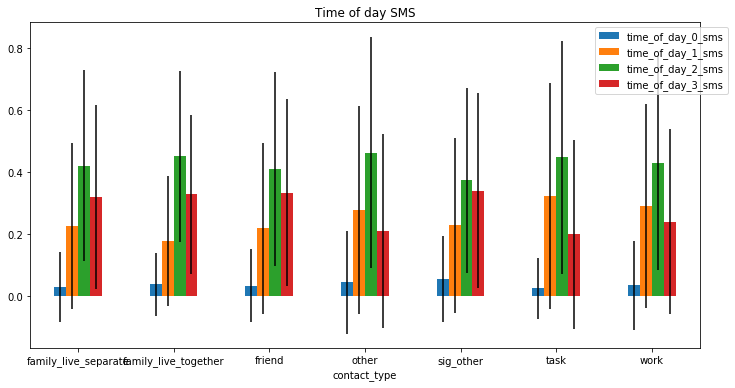

In [14]:
time_day_sms_mean.T.plot.bar(rot=0, yerr=time_day_sms_std)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Time of day SMS")
plt.show()

## Temporal tendency: calls

In [15]:
call_features = comm_features.loc[comm_features['total_calls'] > 0]
time_of_day_calls = ["time_of_day_{}_call".format(x) for x in range(4)]
day_of_week_calls = ["day_{}_call".format(x) for x in range(7)]

time_day_calls_mean = call_features.groupby('contact_type')[time_of_day_calls].mean().T
time_day_calls_std = call_features.groupby('contact_type')[time_of_day_calls].std()

display(time_day_calls_mean)

day_wk_calls_mean = call_features.groupby('contact_type')[day_of_week_calls].mean().T
day_wk_calls_std = call_features.groupby('contact_type')[day_of_week_calls].std()

display(day_wk_calls_mean)

contact_type,family_live_separate,family_live_together,friend,other,sig_other,task,work
time_of_day_0_call,0.010,0.022,0.025,0.018,0.030,0.012,0.030
time_of_day_1_call,0.200,0.200,0.191,0.284,0.196,0.301,0.284
time_of_day_2_call,0.489,0.487,0.450,0.527,0.474,0.540,0.563
time_of_day_3_call,0.300,0.291,0.334,0.171,0.299,0.148,0.123


contact_type,family_live_separate,family_live_together,friend,other,sig_other,task,work
day_0_call,0.115,0.179,0.135,0.171,0.133,0.213,0.181
day_1_call,0.109,0.141,0.135,0.174,0.168,0.179,0.192
day_2_call,0.148,0.141,0.155,0.166,0.176,0.171,0.165
day_3_call,0.161,0.124,0.147,0.162,0.163,0.151,0.162
day_4_call,0.190,0.163,0.158,0.172,0.152,0.145,0.195
day_5_call,0.154,0.133,0.147,0.094,0.105,0.090,0.047
day_6_call,0.124,0.119,0.122,0.062,0.103,0.050,0.058


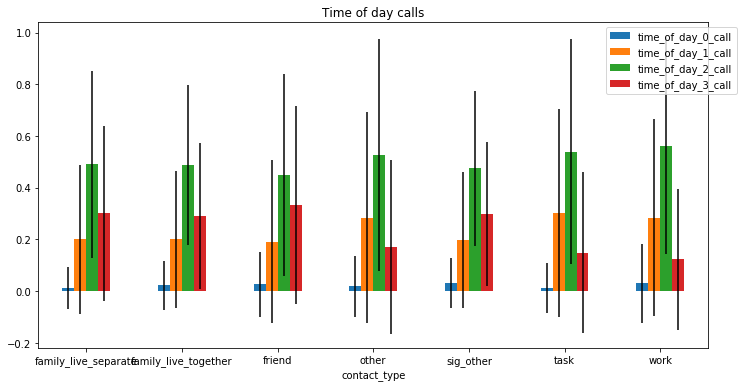

In [16]:
time_day_calls_mean.T.plot.bar(rot=0, yerr=time_day_calls_std)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Time of day calls")
plt.show()

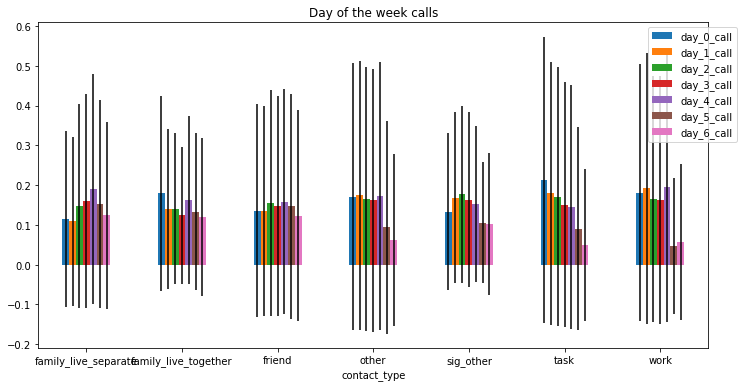

In [17]:
day_wk_calls_mean.T.plot.bar(rot=0, yerr=day_wk_calls_std)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Day of the week calls")
plt.show()

# Channel selection: outgoing ratio, call/text ratio

Features created:
- `out_comm`: out comm / total comm
- `call_tendency`: call count / total comm

Note on interpretation: a lower call tendency indicates a higher text tendency, and vice versa

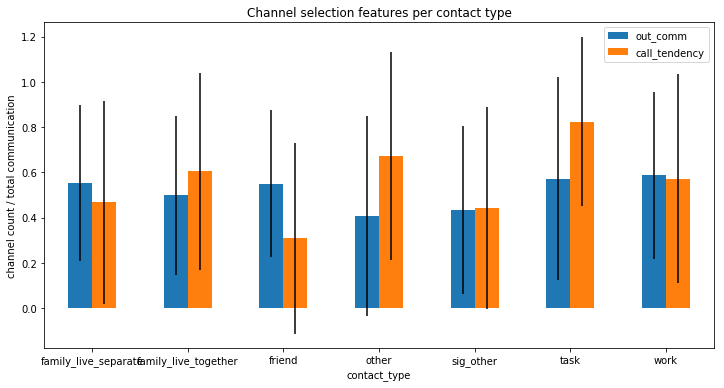

In [18]:
channel_select_mean = comm_features.groupby('contact_type')[['out_comm', 'call_tendency']].mean()
channel_select_std = comm_features.groupby('contact_type')[['out_comm', 'call_tendency']].std()
channel_select_mean.plot.bar(rot=0, yerr=channel_select_std)
plt.title("Channel selection features per contact type")
plt.ylabel("channel count / total communication")
plt.show()

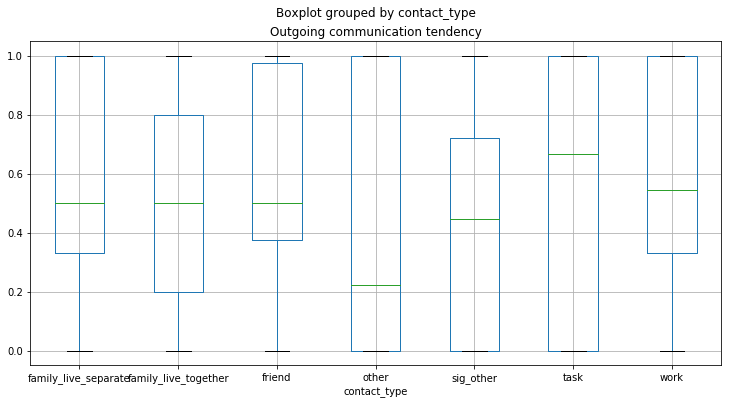

In [19]:
comm_features.boxplot(column='out_comm', by='contact_type')
plt.title("Outgoing communication tendency")
plt.show()

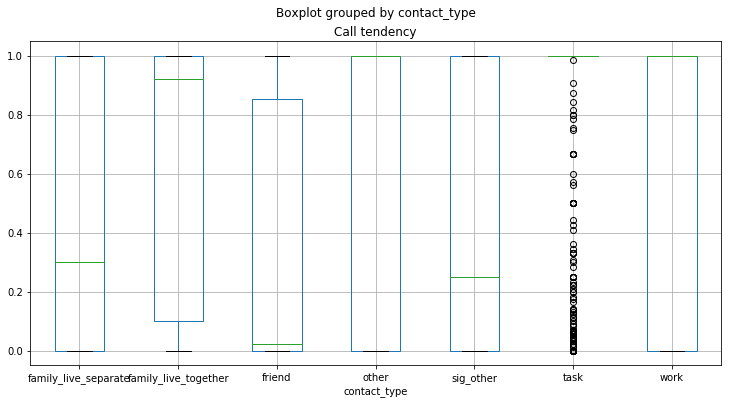

In [20]:
comm_features.boxplot(column='call_tendency', by='contact_type')
plt.title("Call tendency")
plt.show()

# Intensity: mean, std, min, med, max of call, sms, call duration

Features created:
- {mean, std} {out, in} {call, sms} per study day

In [21]:
features = ["mean_in_{}", "std_in_{}", "mean_out_{}", "std_out_{}", "min_in_{}", "max_in_{}", "med_in_{}", "min_out_{}", "max_out_{}", "med_out_{}"]

call_feat_list = [x.format("call") for x in features]
sms_feat_list = [x.format("sms") for x in features]

intensity_sms_mean = sms_features.groupby('contact_type')[sms_feat_list].mean().T
display(intensity_sms_mean)

intensity_call_mean = call_features.groupby('contact_type')[call_feat_list].mean().T
display(intensity_call_mean)

contact_type,family_live_separate,family_live_together,friend,other,sig_other,task,work
mean_in_sms,4.078,9.453,5.237,2.140,20.551,3.779,1.900
std_in_sms,3.542,5.882,4.476,2.230,7.240,3.022,1.974
mean_out_sms,3.948,10.311,5.092,1.733,20.939,4.320,1.790
std_out_sms,3.575,6.633,4.755,2.092,8.589,3.217,2.078
min_in_sms,1.872,1.895,2.472,1.835,7.133,2.282,1.582
max_in_sms,11.067,20.679,14.362,6.562,35.474,9.576,5.986
med_in_sms,4.723,8.778,6.621,3.585,18.250,4.927,2.985
min_out_sms,1.952,2.660,2.603,1.387,6.107,1.739,1.699
max_out_sms,10.951,22.944,14.652,6.214,38.347,10.244,6.107
med_out_sms,4.710,10.031,6.793,2.871,18.656,4.570,3.055


contact_type,family_live_separate,family_live_together,friend,other,sig_other,task,work
mean_in_call,0.480,0.902,0.326,0.095,1.716,0.091,0.176
std_in_call,0.499,0.719,0.388,0.187,1.023,0.163,0.275
mean_out_call,0.730,1.377,0.460,0.188,3.075,0.269,0.324
std_out_call,0.741,0.974,0.594,0.330,1.532,0.496,0.523
min_in_call,0.304,0.314,0.331,0.347,0.493,0.260,0.291
max_in_call,1.494,2.310,1.129,0.524,3.611,0.451,0.726
med_in_call,0.682,0.911,0.629,0.410,1.581,0.334,0.443
min_out_call,0.673,0.471,0.633,0.677,0.926,0.903,0.762
max_out_call,2.228,3.343,1.711,0.948,6.143,1.405,1.399
med_out_call,1.160,1.365,1.006,0.779,2.729,1.046,0.970


In [22]:
call_dur_mean = call_features.groupby('contact_type')[['max_in_duration', 'max_out_duration', 'avg_in_duration', 'avg_out_duration']].mean().T
display(call_dur_mean)

contact_type,family_live_separate,family_live_together,friend,other,sig_other,task,work
max_in_duration,"1,412.693",692.718,"1,198.333",351.816,"2,516.870",376.470,403.340
max_out_duration,872.895,363.832,735.114,354.553,"1,602.395",347.306,381.371
avg_in_duration,696.366,166.489,677.511,272.974,531.137,307.251,283.390
avg_out_duration,321.145,92.389,192.850,175.291,432.334,224.452,177.008


# Avoidance: missed calls, in/out ratios

Features created:
- `missed_{in, out}_calls`: missed call / {in, out} calls
- `in_out_sms`: in texts / out texts

In [23]:
channel_select_mean = comm_features.groupby('contact_type')[['missed_in_calls', 'missed_out_calls', 'in_out_sms']].mean()
display(channel_select_mean)

,missed_in_calls,missed_out_calls,in_out_sms
contact_type,,,
family_live_separate,0.594,0.363,1.240
family_live_together,0.730,0.471,2.188
friend,0.504,0.395,0.951
other,0.294,0.170,2.197
sig_other,0.552,0.449,2.232
task,0.444,0.176,2.719
work,0.392,0.248,1.080


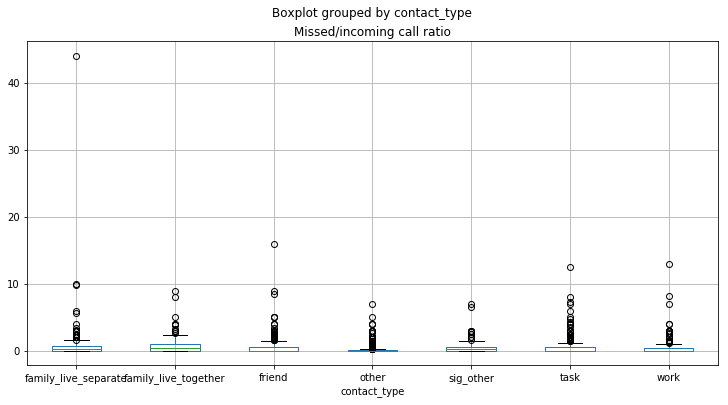

In [24]:
comm_features.boxplot(column='missed_in_calls', by='contact_type')
plt.title("Missed/incoming call ratio")
plt.show()

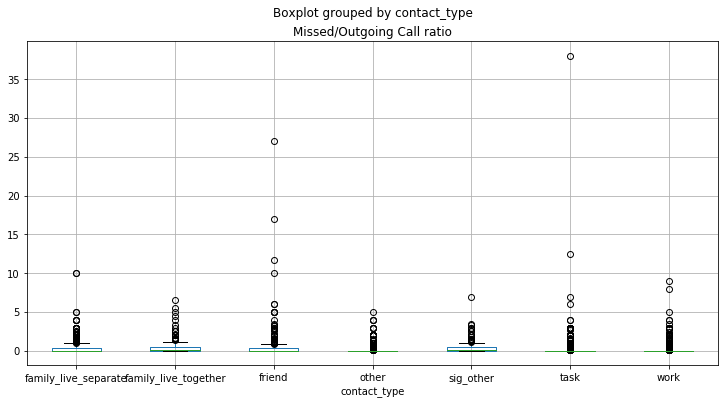

In [25]:
comm_features.boxplot(column='missed_out_calls', by='contact_type')
plt.title("Missed/Outgoing Call ratio")
plt.show()

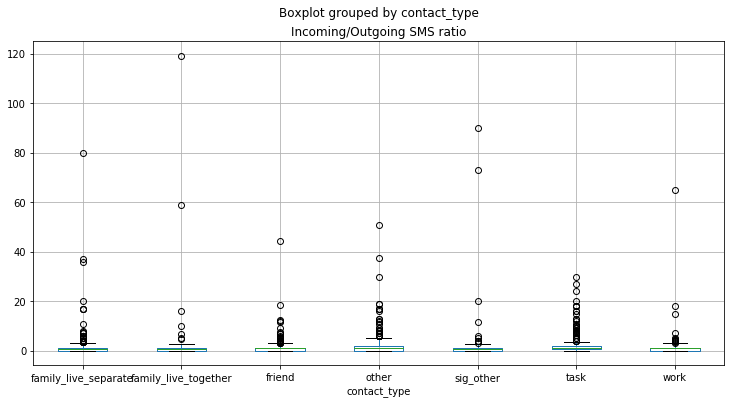

In [26]:
comm_features.boxplot(column='in_out_sms', by='contact_type')
plt.title("Incoming/Outgoing SMS ratio")
plt.show()

# NaN imputation

- NaNs as a result of divide by zeros are filled with zero, with an additional indicator column for the feature

In [27]:
print("Features with NaN values")
display(comm_features.isnull().any())

Features with NaN values


pid                    False
combined_hash          False
total_comms            False
total_comm_days        False
contact_type           False
total_calls            False
total_sms              False
total_sms_days         False
total_call_days        False
reg_call               False
reg_sms                False
reg_comm               False
time_of_day_0_call      True
time_of_day_1_call      True
time_of_day_2_call      True
time_of_day_3_call      True
day_0_call              True
day_1_call              True
day_2_call              True
day_3_call              True
day_4_call              True
day_5_call              True
day_6_call              True
time_of_day_0_sms       True
time_of_day_1_sms       True
time_of_day_2_sms       True
time_of_day_3_sms       True
day_0_sms               True
day_1_sms               True
day_2_sms               True
                       ...  
min_in_sms              True
med_in_sms              True
max_in_sms              True
mean_out_sms  

In [28]:
comm_features = build_nan_features(comm_features)

# Contact EMA responses

In [29]:
# TODO move into python module
emc_all = pickle.load(open('../data/emc_all.df', 'rb'))
hash_dict = pickle.load(open('../data/emc_to_canonical.dict', 'rb'))
pr_dict = pickle.load(open('../data/pr.dict', 'rb'))

#emc_all = emc_all.reset_index(drop=True)

In [30]:
emc_df = pd.DataFrame()
emc_df = build_emc_features(comm_features, comm_df, emc_all, hash_dict, pr_dict)

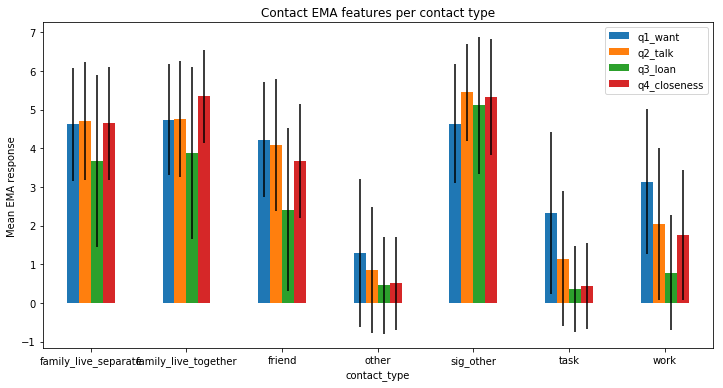

,q1_want,q2_talk,q3_loan,q4_closeness
contact_type,,,,
family_live_separate,4.618,4.701,3.676,4.645
family_live_together,4.741,4.756,3.879,5.343
friend,4.223,4.086,2.416,3.665
other,1.294,0.848,0.456,0.503
sig_other,4.639,5.444,5.110,5.330
task,2.329,1.145,0.368,0.445
work,3.139,2.045,0.777,1.756


,q1_want,q2_talk,q3_loan,q4_closeness
contact_type,,,,
family_live_separate,1.453,1.532,2.217,1.459
family_live_together,1.438,1.499,2.213,1.210
friend,1.483,1.710,2.120,1.474
other,1.922,1.621,1.252,1.200
sig_other,1.550,1.255,1.764,1.495
task,2.087,1.738,1.113,1.112
work,1.870,1.971,1.487,1.674


In [31]:
emc_features = ['q1_want', 'q2_talk', 'q3_loan', 'q4_closeness']
emc_features_mean = emc_df.groupby('contact_type')[emc_features].mean()
emc_features_std = emc_df.groupby('contact_type')[emc_features].std()

emc_features_mean.plot.bar(rot=0, yerr=emc_features_std)
plt.title("Contact EMA features per contact type")
plt.ylabel("Mean EMA response")
plt.show()

display(emc_features_mean)
display(emc_features_std)

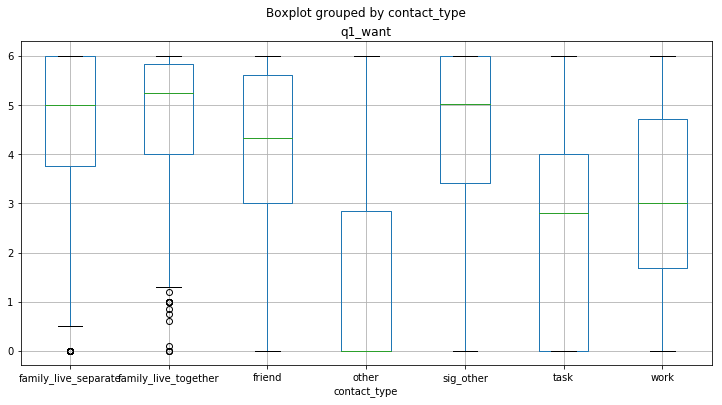

In [32]:
emc_df.boxplot(column='q1_want', by='contact_type')
plt.show()

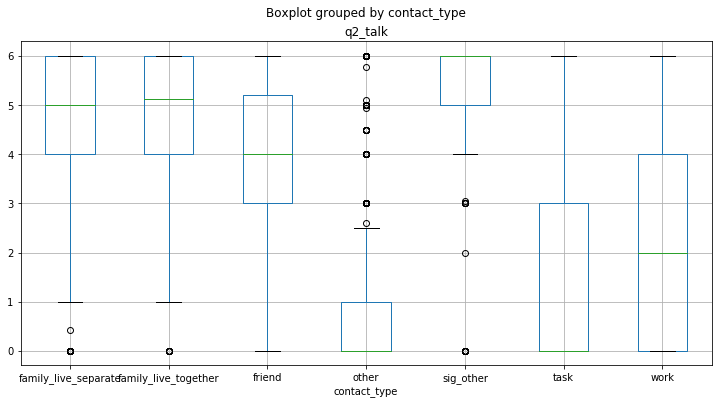

In [33]:
emc_df.boxplot(column='q2_talk', by='contact_type')
plt.show()

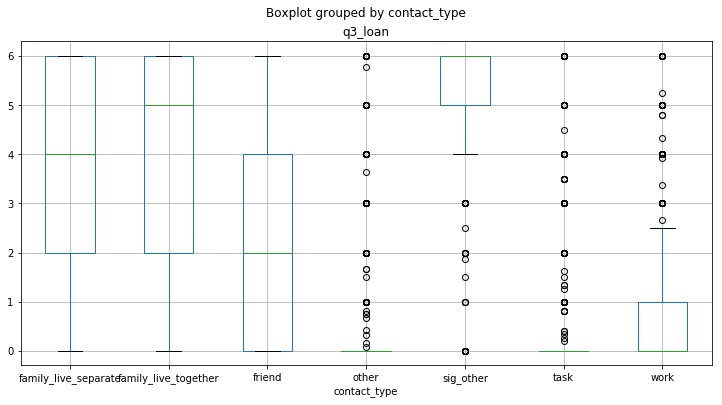

In [34]:
emc_df.boxplot(column='q3_loan', by='contact_type')
plt.show()

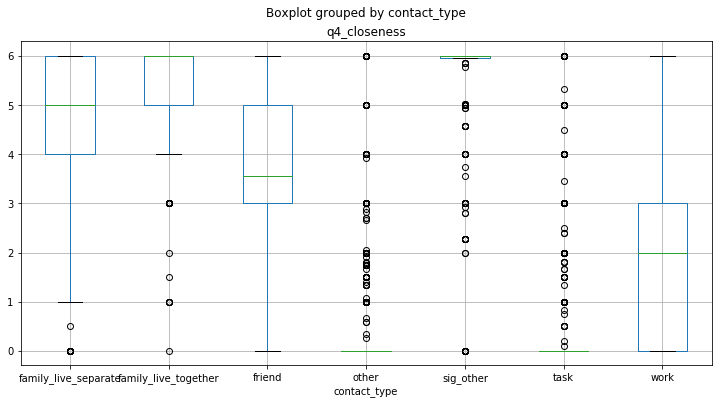

In [35]:
emc_df.boxplot(column='q4_closeness', by='contact_type')
plt.show()

# Demographic features

In [36]:
demo_df = pickle.load(open('../data/demographics.df', 'rb'))
demo_cols = ['pid', 'age', 'gender', 'education', 'employment', 'live_together', 'race', 'ethnicity', 'marital_status']
plt.rcParams["figure.figsize"] = [12,6]

Text(0.5, 0, 'age')

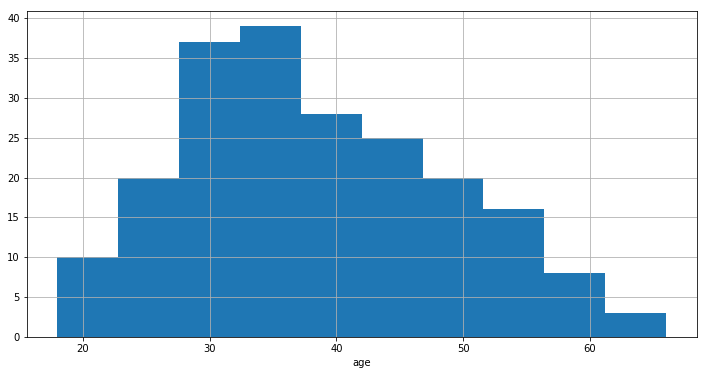

In [37]:
demo_df['age'].hist()
plt.xlabel('age')

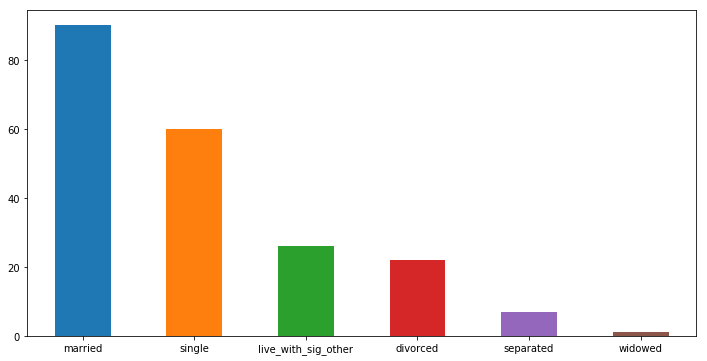

In [38]:
demo_df['marital_status'].value_counts().plot.bar(rot=0)

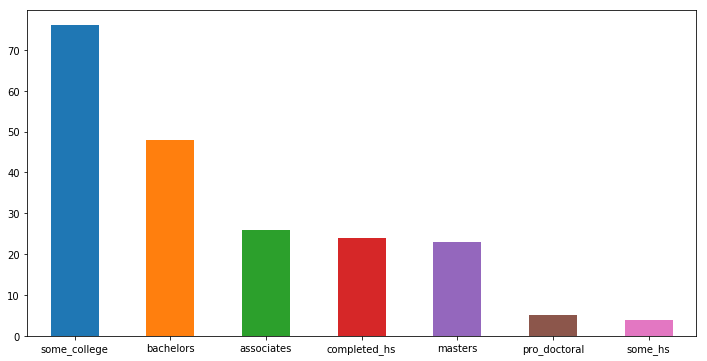

In [39]:
demo_df['education'].value_counts().plot.bar(rot=0)
plt.show()

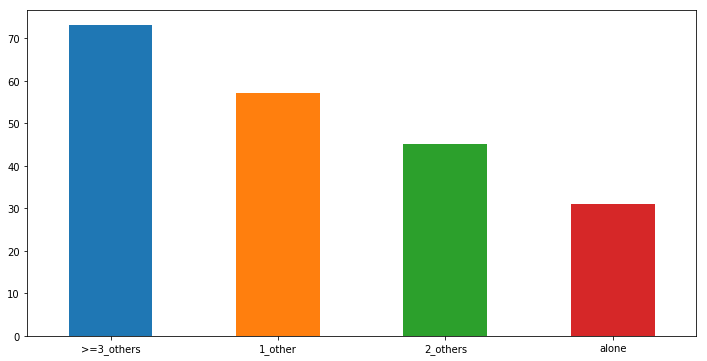

In [40]:
demo_df['live_together'].value_counts().plot.bar(rot=0)

# Semantic location features

In [41]:
#loc_df = pickle.load(open('../data/top_10_contacts_loc_final.df', 'rb'))
loc_features = build_location_features(comm_features, comm_df)
plt.rcParams["figure.figsize"] = [15,10]

## SMS tendencies

In [42]:
all_sms_loc_cols = [x for x in loc_features.columns if x.startswith('all_sms_loc:')]
all_sms_visit_cols = [x for x in loc_features.columns if x.startswith('all_sms_visit_reason:')]

out_sms_loc_cols = [x for x in loc_features.columns if x.startswith('out_sms_loc:')]
out_sms_visit_cols = [x for x in loc_features.columns if x.startswith('out_sms_visit_reason:')]

### Locations

#### Total SMS

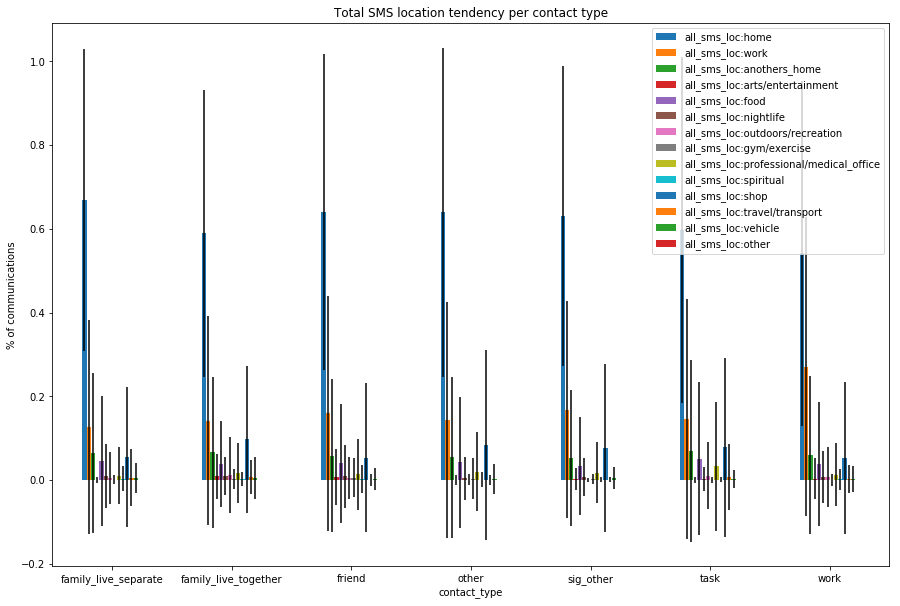

Mean


,all_sms_loc:home,all_sms_loc:work,all_sms_loc:anothers_home,all_sms_loc:arts/entertainment,all_sms_loc:food,all_sms_loc:nightlife,all_sms_loc:outdoors/recreation,all_sms_loc:gym/exercise,all_sms_loc:professional/medical_office,all_sms_loc:spiritual,all_sms_loc:shop,all_sms_loc:travel/transport,all_sms_loc:vehicle,all_sms_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.669,0.126,0.064,0.001,0.046,0.009,0.005,0.001,0.011,0.003,0.055,0.006,0.004,0.000
family_live_together,0.589,0.142,0.067,0.009,0.039,0.009,0.012,0.003,0.018,0.002,0.097,0.008,0.005,0.000
friend,0.641,0.159,0.058,0.007,0.041,0.009,0.005,0.006,0.014,0.003,0.053,0.001,0.002,0.000
other,0.640,0.144,0.054,0.001,0.042,0.004,0.001,0.003,0.020,0.001,0.084,0.001,0.003,0.000
sig_other,0.630,0.168,0.052,0.003,0.034,0.008,0.001,0.002,0.018,0.001,0.078,0.001,0.005,0.000
task,0.598,0.146,0.070,0.001,0.051,0.002,0.011,0.000,0.033,0.000,0.078,0.007,0.002,0.000
work,0.541,0.271,0.059,0.003,0.038,0.007,0.007,0.001,0.013,0.002,0.053,0.002,0.003,0.000


Std Dev


,all_sms_loc:home,all_sms_loc:work,all_sms_loc:anothers_home,all_sms_loc:arts/entertainment,all_sms_loc:food,all_sms_loc:nightlife,all_sms_loc:outdoors/recreation,all_sms_loc:gym/exercise,all_sms_loc:professional/medical_office,all_sms_loc:spiritual,all_sms_loc:shop,all_sms_loc:travel/transport,all_sms_loc:vehicle,all_sms_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.361,0.255,0.191,0.008,0.155,0.077,0.061,0.010,0.067,0.030,0.167,0.068,0.036,0.000
family_live_together,0.342,0.250,0.181,0.054,0.102,0.045,0.091,0.025,0.072,0.017,0.175,0.040,0.050,0.000
friend,0.377,0.281,0.182,0.067,0.142,0.075,0.051,0.047,0.085,0.034,0.178,0.014,0.025,0.000
other,0.393,0.281,0.192,0.012,0.157,0.052,0.013,0.049,0.094,0.018,0.226,0.012,0.036,0.000
sig_other,0.358,0.258,0.162,0.026,0.117,0.046,0.005,0.012,0.073,0.006,0.201,0.007,0.027,0.000
task,0.413,0.287,0.218,0.008,0.182,0.029,0.080,0.007,0.153,0.006,0.214,0.079,0.021,0.000
work,0.411,0.357,0.188,0.049,0.148,0.063,0.072,0.015,0.075,0.024,0.181,0.033,0.032,0.000


In [43]:
sms_loc_features_mean = loc_features.groupby('contact_type')[all_sms_loc_cols].mean()
sms_loc_features_std = loc_features.groupby('contact_type')[all_sms_loc_cols].std()

sms_loc_features_mean.plot.bar(rot=0, yerr=sms_loc_features_std)
plt.title("Total SMS location tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(sms_loc_features_mean)
print("Std Dev")
display(sms_loc_features_std)

#### Outgoing SMS

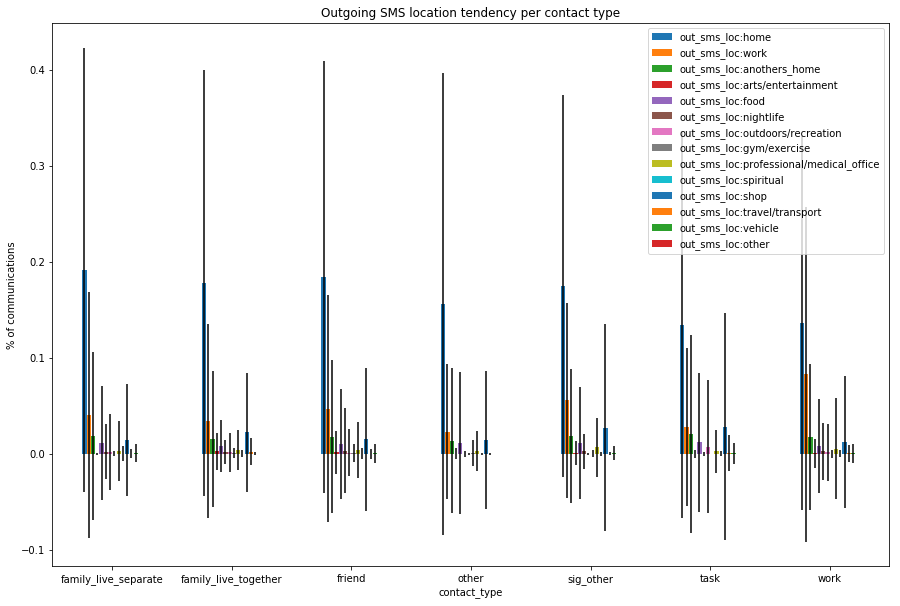

Mean


,out_sms_loc:home,out_sms_loc:work,out_sms_loc:anothers_home,out_sms_loc:arts/entertainment,out_sms_loc:food,out_sms_loc:nightlife,out_sms_loc:outdoors/recreation,out_sms_loc:gym/exercise,out_sms_loc:professional/medical_office,out_sms_loc:spiritual,out_sms_loc:shop,out_sms_loc:travel/transport,out_sms_loc:vehicle,out_sms_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.192,0.041,0.019,0.000,0.012,0.002,0.002,0.000,0.003,0.001,0.014,0.000,0.001,0.000
family_live_together,0.178,0.035,0.016,0.003,0.009,0.002,0.002,0.001,0.004,0.000,0.022,0.002,0.000,0.000
friend,0.184,0.047,0.018,0.002,0.011,0.004,0.002,0.001,0.004,0.000,0.015,0.000,0.001,0.000
other,0.156,0.023,0.014,0.000,0.012,0.000,0.000,0.001,0.003,0.000,0.014,0.000,0.000,0.000
sig_other,0.175,0.056,0.019,0.001,0.012,0.003,0.000,0.001,0.007,0.000,0.028,0.000,0.001,0.000
task,0.134,0.028,0.021,0.000,0.012,0.000,0.008,0.000,0.003,0.000,0.029,0.001,0.001,0.000
work,0.136,0.083,0.018,0.001,0.008,0.003,0.002,0.000,0.005,0.000,0.012,0.001,0.001,0.000


Std Dev


,out_sms_loc:home,out_sms_loc:work,out_sms_loc:anothers_home,out_sms_loc:arts/entertainment,out_sms_loc:food,out_sms_loc:nightlife,out_sms_loc:outdoors/recreation,out_sms_loc:gym/exercise,out_sms_loc:professional/medical_office,out_sms_loc:spiritual,out_sms_loc:shop,out_sms_loc:travel/transport,out_sms_loc:vehicle,out_sms_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.231,0.128,0.088,0.001,0.059,0.029,0.040,0.003,0.031,0.008,0.058,0.005,0.009,0.000
family_live_together,0.222,0.101,0.071,0.019,0.027,0.012,0.020,0.005,0.021,0.004,0.062,0.014,0.002,0.000
friend,0.225,0.118,0.080,0.022,0.057,0.044,0.025,0.010,0.029,0.006,0.074,0.005,0.010,0.000
other,0.240,0.070,0.076,0.006,0.074,0.003,0.001,0.014,0.021,0.001,0.072,0.001,0.000,0.000
sig_other,0.199,0.101,0.070,0.013,0.058,0.018,0.001,0.004,0.031,0.002,0.108,0.002,0.007,0.000
task,0.201,0.082,0.103,0.004,0.073,0.002,0.069,0.000,0.023,0.003,0.118,0.019,0.011,0.000
work,0.195,0.174,0.076,0.015,0.049,0.030,0.030,0.004,0.052,0.004,0.069,0.009,0.010,0.000


In [44]:
sms_loc_features_mean = loc_features.groupby('contact_type')[out_sms_loc_cols].mean()
sms_loc_features_std = loc_features.groupby('contact_type')[out_sms_loc_cols].std()

sms_loc_features_mean.plot.bar(rot=0, yerr=sms_loc_features_std)
plt.title("Outgoing SMS location tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(sms_loc_features_mean)
print("Std Dev")
display(sms_loc_features_std)

### Visit Reasons

#### All SMS

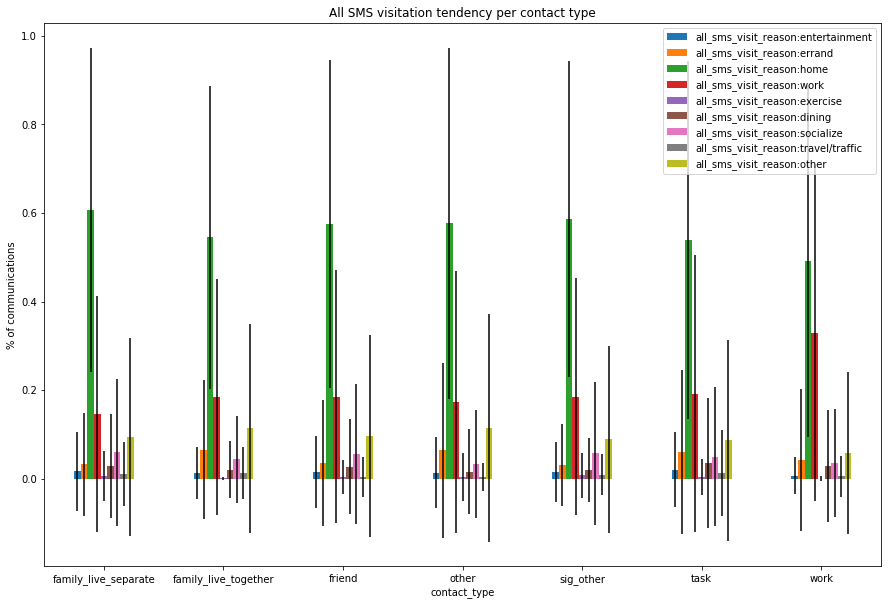

Mean


,all_sms_visit_reason:entertainment,all_sms_visit_reason:errand,all_sms_visit_reason:home,all_sms_visit_reason:work,all_sms_visit_reason:exercise,all_sms_visit_reason:dining,all_sms_visit_reason:socialize,all_sms_visit_reason:travel/traffic,all_sms_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.016,0.032,0.607,0.146,0.006,0.028,0.059,0.010,0.094
family_live_together,0.014,0.065,0.545,0.185,0.001,0.020,0.044,0.012,0.114
friend,0.015,0.036,0.576,0.185,0.004,0.027,0.056,0.004,0.097
other,0.014,0.064,0.577,0.173,0.005,0.016,0.033,0.004,0.115
sig_other,0.015,0.030,0.586,0.186,0.008,0.020,0.057,0.009,0.089
task,0.021,0.060,0.539,0.192,0.004,0.036,0.050,0.012,0.087
work,0.007,0.043,0.492,0.330,0.000,0.029,0.036,0.005,0.059


Std Dev


,all_sms_visit_reason:entertainment,all_sms_visit_reason:errand,all_sms_visit_reason:home,all_sms_visit_reason:work,all_sms_visit_reason:exercise,all_sms_visit_reason:dining,all_sms_visit_reason:socialize,all_sms_visit_reason:travel/traffic,all_sms_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.090,0.117,0.366,0.266,0.056,0.118,0.167,0.072,0.223
family_live_together,0.059,0.157,0.343,0.267,0.004,0.064,0.097,0.059,0.236
friend,0.081,0.142,0.370,0.285,0.038,0.108,0.158,0.045,0.229
other,0.080,0.198,0.396,0.297,0.054,0.096,0.122,0.032,0.257
sig_other,0.067,0.093,0.357,0.267,0.050,0.071,0.162,0.047,0.211
task,0.085,0.185,0.405,0.313,0.040,0.147,0.156,0.097,0.227
work,0.042,0.160,0.398,0.380,0.005,0.126,0.123,0.046,0.183


In [45]:
sms_visit_features_mean = loc_features.groupby('contact_type')[all_sms_visit_cols].mean()
sms_visit_features_std = loc_features.groupby('contact_type')[all_sms_visit_cols].std()

sms_visit_features_mean.plot.bar(rot=0, yerr=sms_visit_features_std)
plt.title("All SMS visitation tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(sms_visit_features_mean)
print("Std Dev")
display(sms_visit_features_std)

#### Outgoing SMS

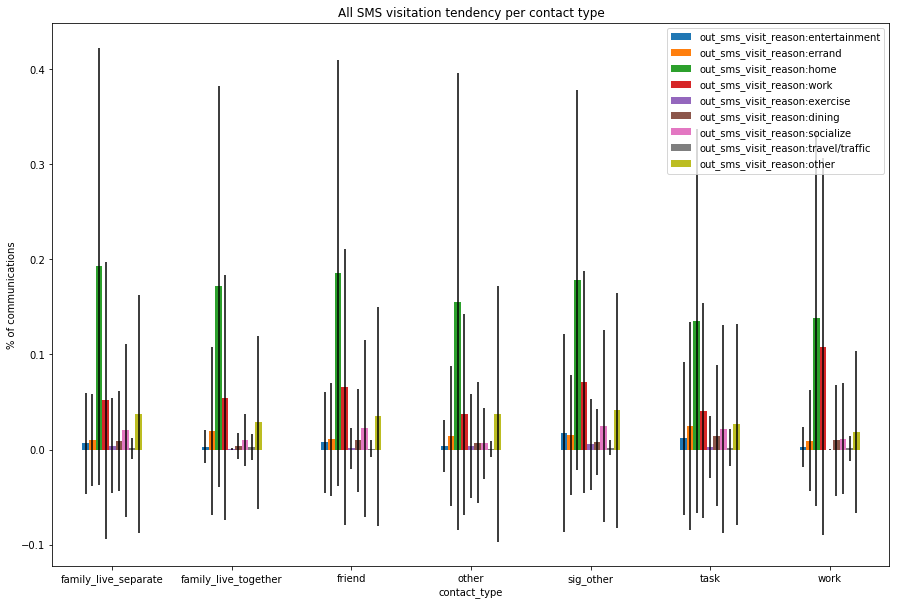

Mean


,out_sms_visit_reason:entertainment,out_sms_visit_reason:errand,out_sms_visit_reason:home,out_sms_visit_reason:work,out_sms_visit_reason:exercise,out_sms_visit_reason:dining,out_sms_visit_reason:socialize,out_sms_visit_reason:travel/traffic,out_sms_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.007,0.010,0.193,0.052,0.004,0.009,0.020,0.001,0.037
family_live_together,0.003,0.019,0.172,0.055,0.000,0.004,0.010,0.003,0.029
friend,0.007,0.011,0.185,0.066,0.001,0.010,0.022,0.001,0.035
other,0.003,0.014,0.156,0.037,0.004,0.007,0.007,0.000,0.037
sig_other,0.017,0.015,0.178,0.071,0.006,0.007,0.025,0.002,0.041
task,0.012,0.025,0.136,0.041,0.002,0.014,0.021,0.002,0.026
work,0.002,0.009,0.138,0.108,0.000,0.010,0.011,0.001,0.018


Std Dev


,out_sms_visit_reason:entertainment,out_sms_visit_reason:errand,out_sms_visit_reason:home,out_sms_visit_reason:work,out_sms_visit_reason:exercise,out_sms_visit_reason:dining,out_sms_visit_reason:socialize,out_sms_visit_reason:travel/traffic,out_sms_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.053,0.049,0.230,0.146,0.050,0.052,0.091,0.011,0.125
family_live_together,0.017,0.089,0.211,0.129,0.001,0.014,0.027,0.014,0.091
friend,0.053,0.059,0.224,0.145,0.022,0.054,0.093,0.009,0.116
other,0.028,0.074,0.240,0.106,0.054,0.064,0.037,0.008,0.135
sig_other,0.104,0.063,0.200,0.117,0.048,0.035,0.101,0.008,0.124
task,0.080,0.109,0.202,0.113,0.033,0.074,0.109,0.020,0.105
work,0.021,0.053,0.197,0.198,0.000,0.058,0.058,0.013,0.086


In [46]:
sms_visit_features_mean = loc_features.groupby('contact_type')[out_sms_visit_cols].mean()
sms_visit_features_std = loc_features.groupby('contact_type')[out_sms_visit_cols].std()

sms_visit_features_mean.plot.bar(rot=0, yerr=sms_visit_features_std)
plt.title("All SMS visitation tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(sms_visit_features_mean)
print("Std Dev")
display(sms_visit_features_std)

## Call tendencies

In [47]:
all_call_loc_cols = [x for x in loc_features.columns if x.startswith('all_call_loc:')]
all_call_visit_cols = [x for x in loc_features.columns if x.startswith('all_call_visit_reason:')]

out_call_loc_cols = [x for x in loc_features.columns if x.startswith('out_call_loc:')]
out_call_visit_cols = [x for x in loc_features.columns if x.startswith('out_call_visit_reason:')]

dur_call_loc_cols = [x for x in loc_features.columns if x.startswith('dur_call_loc:')]
dur_call_visit_cols = [x for x in loc_features.columns if x.startswith('dur_call_visit_reason:')]

### Locations

#### All calls

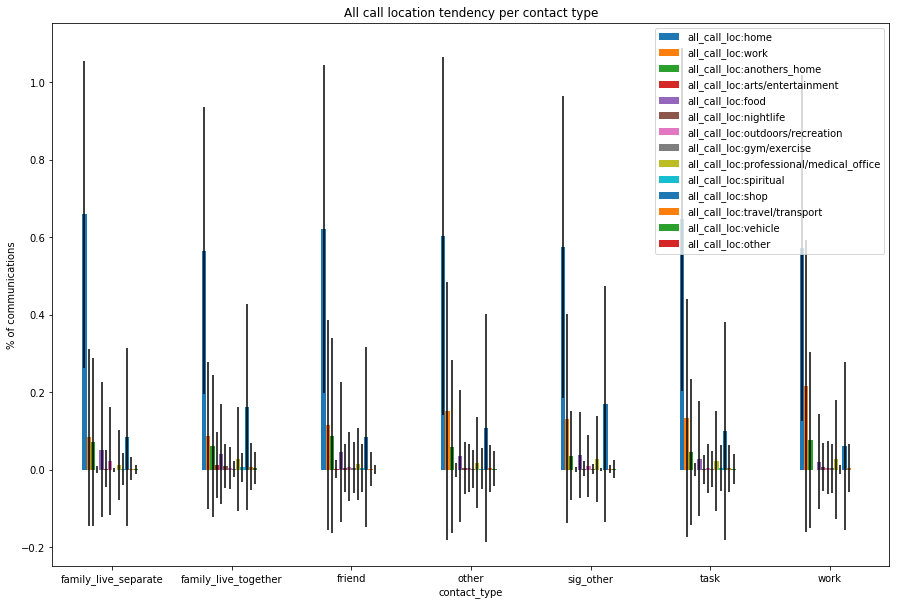

Mean


,all_call_loc:home,all_call_loc:work,all_call_loc:anothers_home,all_call_loc:arts/entertainment,all_call_loc:food,all_call_loc:nightlife,all_call_loc:outdoors/recreation,all_call_loc:gym/exercise,all_call_loc:professional/medical_office,all_call_loc:spiritual,all_call_loc:shop,all_call_loc:travel/transport,all_call_loc:vehicle,all_call_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.659,0.084,0.071,0.001,0.052,0.004,0.023,0.000,0.013,0.002,0.085,0.003,0.001,0.000
family_live_together,0.566,0.088,0.062,0.013,0.041,0.010,0.006,0.002,0.029,0.006,0.162,0.008,0.006,0.000
friend,0.621,0.116,0.089,0.001,0.046,0.005,0.009,0.005,0.015,0.005,0.085,0.003,0.001,0.000
other,0.603,0.152,0.059,0.001,0.036,0.005,0.004,0.002,0.018,0.003,0.108,0.004,0.003,0.000
sig_other,0.575,0.132,0.036,0.001,0.037,0.003,0.010,0.002,0.028,0.000,0.170,0.002,0.003,0.000
task,0.646,0.133,0.047,0.001,0.029,0.002,0.005,0.003,0.023,0.004,0.101,0.004,0.002,0.000
work,0.572,0.217,0.076,0.000,0.022,0.007,0.006,0.004,0.028,0.001,0.062,0.006,0.000,0.000


Std Dev


,all_call_loc:home,all_call_loc:work,all_call_loc:anothers_home,all_call_loc:arts/entertainment,all_call_loc:food,all_call_loc:nightlife,all_call_loc:outdoors/recreation,all_call_loc:gym/exercise,all_call_loc:professional/medical_office,all_call_loc:spiritual,all_call_loc:shop,all_call_loc:travel/transport,all_call_loc:vehicle,all_call_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.397,0.228,0.216,0.009,0.174,0.047,0.140,0.005,0.091,0.041,0.229,0.030,0.012,0.000
family_live_together,0.370,0.189,0.183,0.086,0.130,0.057,0.054,0.019,0.134,0.038,0.266,0.061,0.041,0.000
friend,0.423,0.271,0.252,0.023,0.181,0.062,0.090,0.066,0.092,0.062,0.231,0.044,0.012,0.000
other,0.462,0.334,0.223,0.018,0.171,0.067,0.062,0.049,0.117,0.053,0.293,0.060,0.046,0.000
sig_other,0.390,0.270,0.115,0.007,0.111,0.019,0.080,0.014,0.110,0.003,0.305,0.011,0.024,0.000
task,0.443,0.307,0.188,0.017,0.148,0.038,0.063,0.047,0.130,0.059,0.282,0.060,0.040,0.000
work,0.446,0.377,0.227,0.000,0.123,0.062,0.068,0.063,0.154,0.012,0.216,0.062,0.000,0.000


In [48]:
call_loc_features_mean = loc_features.groupby('contact_type')[all_call_loc_cols].mean()
call_loc_features_std = loc_features.groupby('contact_type')[all_call_loc_cols].std()

call_loc_features_mean.plot.bar(rot=0, yerr=call_loc_features_std)
plt.title("All call location tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(call_loc_features_mean)
print("Std Dev")
display(call_loc_features_std)

#### Outgoing calls

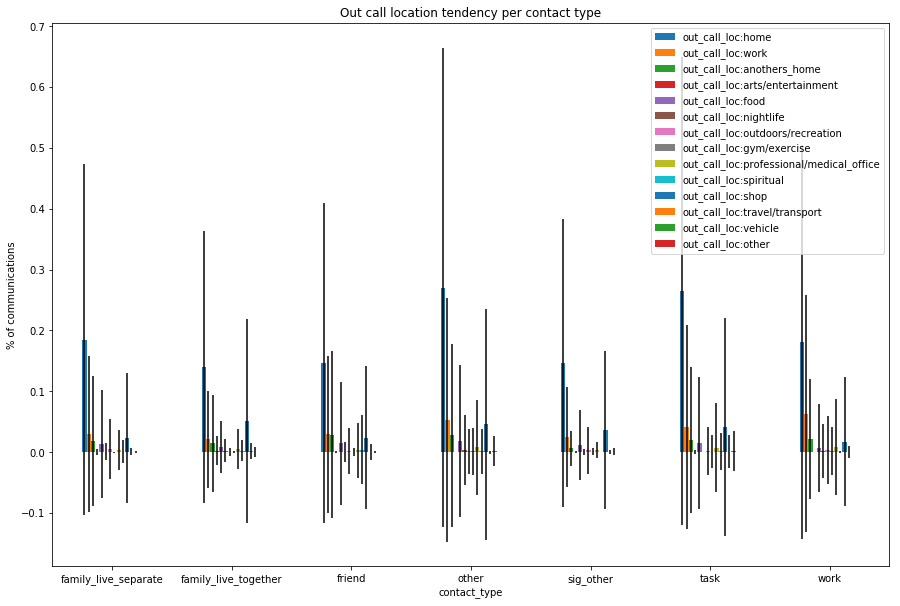

Mean


,out_call_loc:home,out_call_loc:work,out_call_loc:anothers_home,out_call_loc:arts/entertainment,out_call_loc:food,out_call_loc:nightlife,out_call_loc:outdoors/recreation,out_call_loc:gym/exercise,out_call_loc:professional/medical_office,out_call_loc:spiritual,out_call_loc:shop,out_call_loc:travel/transport,out_call_loc:vehicle,out_call_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.185,0.030,0.018,0.000,0.014,0.001,0.005,0.000,0.004,0.001,0.023,0.000,0.000,0.000
family_live_together,0.140,0.021,0.015,0.002,0.009,0.002,0.001,0.000,0.005,0.002,0.052,0.002,0.001,0.000
friend,0.146,0.029,0.028,0.000,0.015,0.001,0.002,0.000,0.003,0.004,0.024,0.000,0.000,0.000
other,0.271,0.053,0.028,0.000,0.018,0.004,0.002,0.002,0.008,0.001,0.046,0.000,0.002,0.000
sig_other,0.147,0.025,0.006,0.000,0.012,0.001,0.003,0.001,0.003,0.000,0.037,0.000,0.001,0.000
task,0.265,0.041,0.020,0.000,0.015,0.000,0.002,0.001,0.007,0.001,0.042,0.001,0.002,0.000
work,0.181,0.063,0.022,0.000,0.007,0.003,0.003,0.002,0.008,0.000,0.017,0.000,0.000,0.000


Std Dev


,out_call_loc:home,out_call_loc:work,out_call_loc:anothers_home,out_call_loc:arts/entertainment,out_call_loc:food,out_call_loc:nightlife,out_call_loc:outdoors/recreation,out_call_loc:gym/exercise,out_call_loc:professional/medical_office,out_call_loc:spiritual,out_call_loc:shop,out_call_loc:travel/transport,out_call_loc:vehicle,out_call_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,0.288,0.128,0.107,0.004,0.088,0.014,0.050,0.001,0.032,0.019,0.107,0.006,0.002,0.000
family_live_together,0.224,0.079,0.080,0.024,0.042,0.019,0.007,0.002,0.033,0.017,0.167,0.013,0.008,0.000
friend,0.263,0.129,0.137,0.001,0.101,0.016,0.038,0.007,0.045,0.057,0.117,0.013,0.001,0.000
other,0.394,0.201,0.150,0.000,0.125,0.057,0.037,0.039,0.077,0.037,0.190,0.002,0.024,0.000
sig_other,0.237,0.082,0.028,0.002,0.058,0.005,0.039,0.005,0.013,0.000,0.130,0.003,0.006,0.000
task,0.385,0.168,0.120,0.003,0.109,0.000,0.039,0.027,0.073,0.030,0.179,0.028,0.033,0.000
work,0.323,0.195,0.099,0.000,0.072,0.044,0.056,0.039,0.079,0.001,0.106,0.010,0.000,0.000


In [49]:
call_loc_features_mean = loc_features.groupby('contact_type')[out_call_loc_cols].mean()
call_loc_features_std = loc_features.groupby('contact_type')[out_call_loc_cols].std()

call_loc_features_mean.plot.bar(rot=0, yerr=call_loc_features_std)
plt.title("Out call location tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(call_loc_features_mean)
print("Std Dev")
display(call_loc_features_std)

#### Call duration

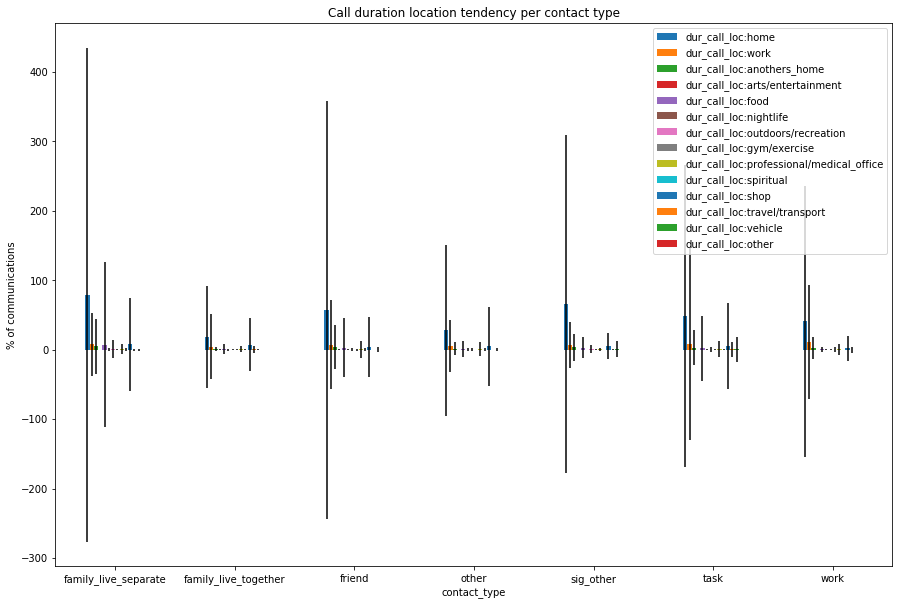

Mean


,dur_call_loc:home,dur_call_loc:work,dur_call_loc:anothers_home,dur_call_loc:arts/entertainment,dur_call_loc:food,dur_call_loc:nightlife,dur_call_loc:outdoors/recreation,dur_call_loc:gym/exercise,dur_call_loc:professional/medical_office,dur_call_loc:spiritual,dur_call_loc:shop,dur_call_loc:travel/transport,dur_call_loc:vehicle,dur_call_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,79.141,7.665,4.682,0.005,7.267,0.123,0.927,0.013,0.620,0.083,7.688,0.115,0.082,0.000
family_live_together,18.463,4.527,0.759,0.088,1.064,0.196,0.073,0.019,0.598,0.108,7.298,0.321,0.071,0.000
friend,56.671,7.308,3.821,0.024,2.936,0.055,0.125,0.056,0.677,0.055,3.914,0.000,0.153,0.000
other,27.719,5.125,1.161,0.000,0.926,0.063,0.109,0.005,0.660,0.064,5.231,0.001,0.112,0.000
sig_other,65.757,6.967,3.223,0.014,2.745,0.008,0.530,0.061,0.400,0.002,5.454,0.038,0.861,0.000
task,48.400,8.811,2.520,0.001,2.226,0.024,0.138,0.018,0.866,0.032,5.306,0.313,0.648,0.000
work,41.022,10.849,2.127,0.000,0.394,0.045,0.029,0.114,0.768,0.000,1.899,0.171,0.000,0.000


Std Dev


,dur_call_loc:home,dur_call_loc:work,dur_call_loc:anothers_home,dur_call_loc:arts/entertainment,dur_call_loc:food,dur_call_loc:nightlife,dur_call_loc:outdoors/recreation,dur_call_loc:gym/exercise,dur_call_loc:professional/medical_office,dur_call_loc:spiritual,dur_call_loc:shop,dur_call_loc:travel/transport,dur_call_loc:vehicle,dur_call_loc:other
contact_type,,,,,,,,,,,,,,
family_live_separate,355.689,45.021,39.299,0.125,118.493,2.649,12.479,0.276,6.898,2.353,66.914,1.415,1.440,0.000
family_live_together,73.658,46.961,2.943,0.889,6.985,1.475,0.812,0.246,3.966,0.736,38.276,4.542,0.987,0.000
friend,301.065,64.343,31.387,0.557,42.121,0.778,2.287,1.483,12.164,1.625,42.590,0.000,4.150,0.000
other,123.339,36.883,9.200,0.000,11.994,1.679,2.544,0.139,10.182,1.951,56.841,0.027,2.611,0.000
sig_other,243.916,32.663,19.779,0.182,15.125,0.088,5.913,0.655,1.634,0.025,18.437,0.291,11.234,0.000
task,217.771,138.136,25.136,0.040,46.833,0.967,3.729,0.747,11.865,0.856,61.275,11.355,18.215,0.000
work,195.288,82.518,15.559,0.000,3.869,0.759,0.818,3.338,7.805,0.000,17.795,4.382,0.000,0.000


In [51]:
call_loc_features_mean = loc_features.groupby('contact_type')[dur_call_loc_cols].mean()
call_loc_features_std = loc_features.groupby('contact_type')[dur_call_loc_cols].std()

call_loc_features_mean.plot.bar(rot=0, yerr=call_loc_features_std)
plt.title("Call duration location tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(call_loc_features_mean)
print("Std Dev")
display(call_loc_features_std)

### Visit Reasons

#### All calls

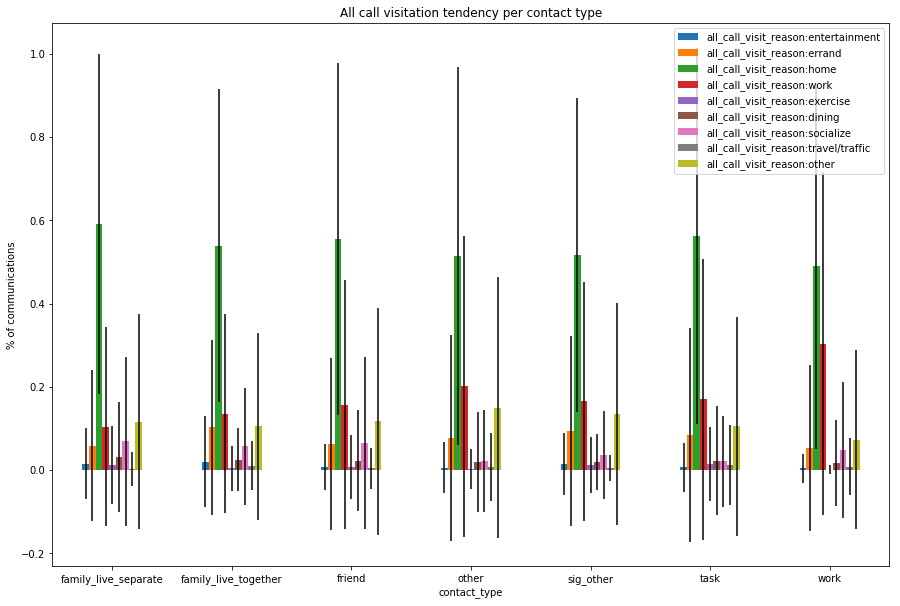

Mean


,all_call_visit_reason:entertainment,all_call_visit_reason:errand,all_call_visit_reason:home,all_call_visit_reason:work,all_call_visit_reason:exercise,all_call_visit_reason:dining,all_call_visit_reason:socialize,all_call_visit_reason:travel/traffic,all_call_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.015,0.058,0.590,0.104,0.012,0.031,0.069,0.004,0.116
family_live_together,0.020,0.102,0.539,0.135,0.005,0.025,0.057,0.011,0.105
friend,0.008,0.062,0.554,0.158,0.008,0.022,0.066,0.004,0.117
other,0.006,0.077,0.514,0.201,0.004,0.019,0.022,0.008,0.150
sig_other,0.016,0.094,0.516,0.166,0.013,0.019,0.036,0.005,0.134
task,0.006,0.085,0.563,0.170,0.015,0.022,0.021,0.012,0.105
work,0.004,0.053,0.491,0.304,0.000,0.017,0.049,0.009,0.073


Std Dev


,all_call_visit_reason:entertainment,all_call_visit_reason:errand,all_call_visit_reason:home,all_call_visit_reason:work,all_call_visit_reason:exercise,all_call_visit_reason:dining,all_call_visit_reason:socialize,all_call_visit_reason:travel/traffic,all_call_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.085,0.181,0.408,0.238,0.093,0.132,0.203,0.041,0.258
family_live_together,0.109,0.210,0.376,0.238,0.054,0.077,0.141,0.059,0.224
friend,0.056,0.206,0.422,0.300,0.077,0.122,0.207,0.048,0.272
other,0.061,0.247,0.454,0.360,0.048,0.120,0.122,0.082,0.314
sig_other,0.074,0.229,0.377,0.287,0.067,0.067,0.105,0.030,0.267
task,0.059,0.257,0.452,0.338,0.088,0.131,0.109,0.097,0.263
work,0.035,0.199,0.439,0.412,0.011,0.104,0.163,0.068,0.214


In [52]:
call_visit_features_mean = loc_features.groupby('contact_type')[all_call_visit_cols].mean()
call_visit_features_std = loc_features.groupby('contact_type')[all_call_visit_cols].std()

call_visit_features_mean.plot.bar(rot=0, yerr=call_visit_features_std)
plt.title("All call visitation tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(call_visit_features_mean)
print("Std Dev")
display(call_visit_features_std)

#### Out calls

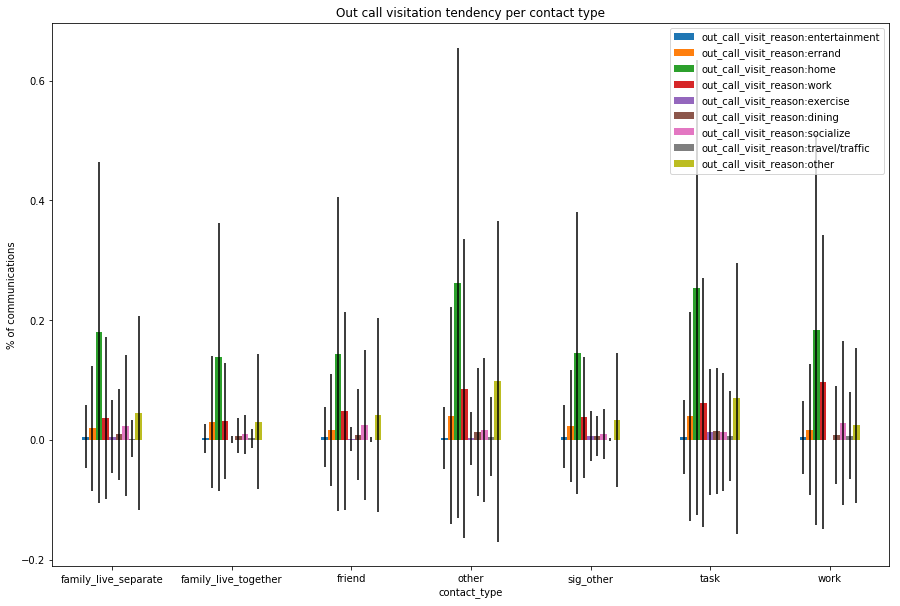

Mean


,out_call_visit_reason:entertainment,out_call_visit_reason:errand,out_call_visit_reason:home,out_call_visit_reason:work,out_call_visit_reason:exercise,out_call_visit_reason:dining,out_call_visit_reason:socialize,out_call_visit_reason:travel/traffic,out_call_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.005,0.019,0.180,0.037,0.006,0.009,0.024,0.002,0.046
family_live_together,0.003,0.030,0.138,0.032,0.001,0.007,0.010,0.003,0.031
friend,0.004,0.017,0.144,0.049,0.002,0.009,0.024,0.000,0.042
other,0.003,0.041,0.262,0.085,0.003,0.013,0.017,0.005,0.098
sig_other,0.006,0.023,0.145,0.038,0.007,0.007,0.009,0.000,0.034
task,0.005,0.039,0.254,0.062,0.013,0.014,0.014,0.007,0.069
work,0.005,0.017,0.184,0.097,0.000,0.009,0.028,0.007,0.024


Std Dev


,out_call_visit_reason:entertainment,out_call_visit_reason:errand,out_call_visit_reason:home,out_call_visit_reason:work,out_call_visit_reason:exercise,out_call_visit_reason:dining,out_call_visit_reason:socialize,out_call_visit_reason:travel/traffic,out_call_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,0.053,0.104,0.285,0.135,0.060,0.076,0.117,0.030,0.162
family_live_together,0.024,0.110,0.224,0.097,0.006,0.029,0.033,0.016,0.113
friend,0.050,0.094,0.263,0.165,0.021,0.076,0.125,0.004,0.162
other,0.052,0.182,0.393,0.250,0.044,0.107,0.120,0.066,0.268
sig_other,0.052,0.094,0.235,0.101,0.041,0.034,0.041,0.003,0.112
task,0.062,0.174,0.380,0.208,0.105,0.105,0.099,0.075,0.226
work,0.061,0.109,0.326,0.245,0.000,0.082,0.137,0.073,0.130


In [53]:
call_visit_features_mean = loc_features.groupby('contact_type')[out_call_visit_cols].mean()
call_visit_features_std = loc_features.groupby('contact_type')[out_call_visit_cols].std()

call_visit_features_mean.plot.bar(rot=0, yerr=call_visit_features_std)
plt.title("Out call visitation tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(call_visit_features_mean)
print("Std Dev")
display(call_visit_features_std)

#### Call duration

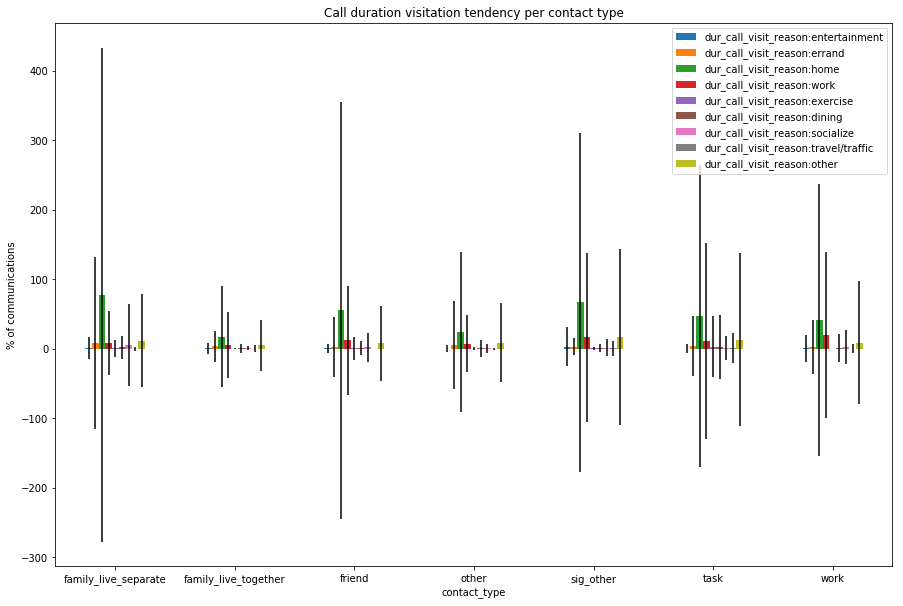

Mean


,dur_call_visit_reason:entertainment,dur_call_visit_reason:errand,dur_call_visit_reason:home,dur_call_visit_reason:work,dur_call_visit_reason:exercise,dur_call_visit_reason:dining,dur_call_visit_reason:socialize,dur_call_visit_reason:travel/traffic,dur_call_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,1.249,8.327,77.905,8.780,0.878,1.966,6.039,0.169,11.782
family_live_together,0.599,3.601,17.581,5.373,0.049,0.814,0.790,0.381,5.306
friend,0.491,2.597,55.524,12.003,0.850,0.958,2.468,0.016,7.724
other,0.226,5.616,24.779,7.558,0.086,0.891,0.496,0.086,8.965
sig_other,3.039,3.156,66.763,16.662,0.514,1.046,1.802,0.835,16.838
task,0.356,4.431,47.232,11.281,2.851,2.060,1.332,1.202,12.956
work,0.696,3.038,41.052,19.982,0.001,1.214,2.546,0.460,8.936


Std Dev


,dur_call_visit_reason:entertainment,dur_call_visit_reason:errand,dur_call_visit_reason:home,dur_call_visit_reason:work,dur_call_visit_reason:exercise,dur_call_visit_reason:dining,dur_call_visit_reason:socialize,dur_call_visit_reason:travel/traffic,dur_call_visit_reason:other
contact_type,,,,,,,,,
family_live_separate,15.999,124.364,355.498,45.736,12.524,16.511,58.812,2.671,66.609
family_live_together,8.200,21.997,73.100,47.116,0.770,6.350,2.698,4.652,36.557
friend,6.552,42.502,299.666,78.128,16.765,10.055,20.816,0.303,53.437
other,5.304,62.862,115.157,40.766,2.263,12.413,6.307,1.576,56.532
sig_other,27.767,11.788,244.011,121.678,2.843,5.882,11.886,11.115,126.197
task,6.883,43.396,217.357,140.426,44.061,46.140,17.256,21.677,124.321
work,19.429,38.578,195.410,119.629,0.038,20.737,24.089,6.381,88.708


In [54]:
call_visit_features_mean = loc_features.groupby('contact_type')[dur_call_visit_cols].mean()
call_visit_features_std = loc_features.groupby('contact_type')[dur_call_visit_cols].std()

call_visit_features_mean.plot.bar(rot=0, yerr=call_visit_features_std)
plt.title("Call duration visitation tendency per contact type")
plt.ylabel("% of communications")
plt.show()
print("Mean")
display(call_visit_features_mean)
print("Std Dev")
display(call_visit_features_std)